#題目
阿竹是一個旅館銷售人員，負責某間旅館的銷售業務，他想針對旅館網頁的訪客進行廣告優惠，但是行銷經費有限，只能針對較有可能消費的訪客進行廣告。阿竹提供了旅館網站的Google Analytics流量統計資料，請資料工程師幫助阿竹找出可能進行消費的訪客。

In [2]:
# 載入library
import numpy as np
import pandas as pd

1.	基本題：預測訪客是否會訂房，請依照流量統計資料train.csv，訓練一個分類模型或回歸模型，預測test.csv中每位訪客是否會進行消費的機率，並依照sample_submission.csv的格式提交預測結果。請記錄資料分析、清理、建模、模型評估的過程，將完整過程、清理後資料與相關程式碼上傳至個人github並提供連結或是寄至 adrian.chen@gmail.com
* 數據包含10個數字屬性和8個分類屬性
* 'Revenue' 屬性將作為標籤 1 代表會訂房 0 代表不會
* 使用訓練資料 train.csv 建立模型，預測 test.csv 是否會訂房
* 屬性說明：
	- Administrative：管理頁面瀏覽數量
	- Administrative_Duration：管理頁面瀏覽時間 (sec)
	- Informational：資訊頁面瀏覽數量
	- Informational_Duration：資訊頁面瀏覽時間
	- ProductRelated：產品頁面瀏覽數量
	- ProductRelated_Duration：產品頁面瀏覽時間
	- BounceRates：跳出率 (上一頁)
	- ExitRates：退出率   (分頁關掉)
	- PageValues：頁面價值 (Google Analytics數值)
	- SpecialDay：特殊日期（例如聖誕節，情人節）接近程度
	- Month：訪問月份
	- OperatingSystems：作業系統 (類別型)
	- Browser：瀏覽器(類別型)
	- Region：地區(類別型)
	- TrafficType：流量來源
	- VisitorType：訪客類型
	- Weekend：訪問時間是否為週末
	- Revenue：是否訂房


In [3]:
df = pd.read_csv('train.csv') #pandas套件讀取CSV檔資料型態為DaraFrame，並存在df變數裡
df.head() #顯示前5筆資料
df.shape

(8100, 19)

STEP1. 資料初步判斷
*   Revenue：是否訂房 (為預測目標)
*   其餘值為訓練特徵







STEP2. 查看資料內是否有丟失值

In [4]:
df.info() #查看表格內容是否有丟失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8100 non-null   int64  
 1   Administrative           8100 non-null   int64  
 2   Administrative_Duration  8100 non-null   float64
 3   Informational            8100 non-null   int64  
 4   Informational_Duration   8100 non-null   float64
 5   ProductRelated           8100 non-null   int64  
 6   ProductRelated_Duration  8099 non-null   float64
 7   BounceRates              8100 non-null   float64
 8   ExitRates                8100 non-null   float64
 9   PageValues               8100 non-null   float64
 10  SpecialDay               8100 non-null   float64
 11  Month                    8100 non-null   int64  
 12  OperatingSystems         8099 non-null   float64
 13  Browser                  8099 non-null   float64
 14  Region                  

以下6個項目有丟失值
*   6 ProductRelated_Duration：產品頁面瀏覽時間
*   12 OperatingSystems：作業系統 (類別型)
*   13 Browser：瀏覽器(類別型) 
*   15 Region：地區(類別型)
*   16 TrafficType：流量來源
*   17 VisitorType : 訪客類型
               







In [5]:
df_1=df.dropna() #將還有遺漏值的數據刪除並存為新的df_1
df_1.info() #查看表格內容是否有丟失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8097 entries, 0 to 8099
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8097 non-null   int64  
 1   Administrative           8097 non-null   int64  
 2   Administrative_Duration  8097 non-null   float64
 3   Informational            8097 non-null   int64  
 4   Informational_Duration   8097 non-null   float64
 5   ProductRelated           8097 non-null   int64  
 6   ProductRelated_Duration  8097 non-null   float64
 7   BounceRates              8097 non-null   float64
 8   ExitRates                8097 non-null   float64
 9   PageValues               8097 non-null   float64
 10  SpecialDay               8097 non-null   float64
 11  Month                    8097 non-null   int64  
 12  OperatingSystems         8097 non-null   float64
 13  Browser                  8097 non-null   float64
 14  Region                  

In [6]:
df_1.shape    #刪除後的資料為8097筆

(8097, 19)

STEP3. 對重新整理好的數據使用皮爾森相關係數查看特徵相關度

In [7]:
featuresCorr = df_1.corr('pearson')['Revenue'] 
print(abs(featuresCorr))
percentage=[]
for i in featuresCorr:
  i=round(abs(i),1)
  if i not in percentage:      
    percentage.append(i)
percentage = sorted(percentage)
del percentage[-1]
print(percentage)

ID                         0.001620
Administrative             0.142896
Administrative_Duration    0.096153
Informational              0.091240
Informational_Duration     0.068625
ProductRelated             0.149102
ProductRelated_Duration    0.005532
BounceRates                0.050021
ExitRates                  0.207755
PageValues                 0.499476
SpecialDay                 0.076347
Month                      0.127974
OperatingSystems           0.070931
Browser                    0.018947
Region                     0.010371
TrafficType                0.088066
VisitorType                0.111296
Weekend                    0.003859
Revenue                    1.000000
Name: Revenue, dtype: float64
[0.0, 0.1, 0.2, 0.5]


查看其他方式的特徵相關度

In [9]:
method=['pearson', 'kendall', 'spearman']
percentage=[]
for k in method:
  featuresCorr = df_1.corr(k)['Revenue'] 
  for i in featuresCorr:
    i=round(abs(i),1)
    if i not in percentage:      
      percentage.append(i)
  percentage = sorted(percentage)
  del percentage[-1]
  print(percentage)
  highly_corr_features=[] #0.1
  highly_corr_features =df_1.columns[df_1.corr(k)['Revenue'].abs() > 0.1]
  highly_corr_features = highly_corr_features.drop('Revenue')
  print(highly_corr_features)

[0.0, 0.1, 0.2, 0.5]
Index(['Administrative', 'ProductRelated', 'ExitRates', 'PageValues', 'Month',
       'VisitorType'],
      dtype='object')
[0.0, 0.1, 0.2, 0.5, 0.6]
Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'VisitorType'],
      dtype='object')
[0.0, 0.1, 0.2, 0.3, 0.5, 0.6]
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month', 'TrafficType',
       'VisitorType'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
n = 6
chi = SelectKBest(chi2, k=n)
arrchi = chi.fit_transform(abs(df_1.iloc[:, 1:-1]), df_1.iloc[:, -1])
score = chi.scores_
scoresort = np.argsort(score)
scoresort = np.flipud(scoresort)
df_1=df_1.iloc[:,1:-1]
col = df_1.columns
print('選擇的特徵：')
for i in range(n):
  print('{}：{}'.format(col[scoresort[i]], score[scoresort[i]]))

選擇的特徵：
ProductRelated_Duration：120527566.48246247
PageValues：113164.40120968515
Administrative_Duration：29954.293840281967
Informational_Duration：21196.2668079551
ProductRelated：11445.589687746675
Administrative：785.1374497152489


最終選擇大於0.1的皮爾森相關係數數值做為訓練特徵
* Administrative
* ProductRelated
* ExitRates
* PageValues
* Month
* VisitorType

In [7]:
highly_corr_features=[] #0.1
highly_corr_features =df_1.columns[df_1.corr('pearson')['Revenue'].abs() > 0.1]
highly_corr_features = highly_corr_features.drop('Revenue')
print(highly_corr_features)
print(len(highly_corr_features))
X=df_1[highly_corr_features]   #取出訓練特徵資料
print(X)
Y=df_1['Revenue']         #取出訓練答案資料

Index(['Administrative', 'ProductRelated', 'ExitRates', 'PageValues', 'Month',
       'VisitorType'],
      dtype='object')
6
      Administrative  ProductRelated  ExitRates  PageValues  Month  \
0                  0               1   0.200000    0.000000      2   
1                  0               1   0.200000    0.000000      9   
2                  9              38   0.044508   10.721172      8   
3                  2             105   0.020276    0.000000      2   
4                  0              19   0.024642    0.000000      2   
...              ...             ...        ...         ...    ...   
8095               0               4   0.050000    0.000000      2   
8096               1              84   0.038706    0.000000      6   
8097               0              25   0.023333    0.000000      6   
8098               9              95   0.018656    5.932009      8   
8099               3              20   0.011688   15.065863      8   

      VisitorType  
0            

將選取的訓練特徵標準化

In [8]:
from sklearn import preprocessing

X = df_1[highly_corr_features] #取出訓練特徵資料
#建立MinMaxScaler物件
X_standardization = df_1[highly_corr_features] #取出正規化的特徵資料
# minmax = preprocessing.MinMaxScaler()
# zscore = preprocessing.StandardScaler()
maxabs = preprocessing.MaxAbsScaler()   #選用最大絕對值標準化
# robust = preprocessing.RobustScaler()
# 資料標準化
# X_standardization_features = minmax.fit_transform(X_standardization)
# X_standardization_features = zscore.fit_transform(X_standardization)
X_standardization_features = maxabs.fit_transform(X_standardization)
# X_standardization_features = robust.fit_transform(X_standardization)
X= pd.DataFrame(X_standardization_features,columns=highly_corr_features)
Y=df_1['Revenue']         #取出訓練答案資料

STEP4. 將X集(Input)與Y集(Output)資料分成訓練集與測試集並訓練模型

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 54)

STEP 4.1 使用KNN演算法訓練

In [10]:
# 使用KNN演算法訓練
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV #KNN超參數選用網格搜尋自動搜尋最佳K值
import matplotlib.pyplot as plt

param_grid = {'n_neighbors':np.arange(10)+1} #網格搜尋參數
model = GridSearchCV(KNeighborsClassifier(),param_grid) #用網格搜尋找出最佳模型
model.fit(X_train,Y_train)
CV_score = cross_val_score(model,X_train,Y_train,cv=10)
print('Best params:',model.best_params_)
print('CV_10 score:',CV_score.mean().round(3))
print('Test score:',model.score(X_test,Y_test).round(3))

Best params: {'n_neighbors': 8}
CV_10 score: 0.885
Test score: 0.875


* KNN n_neighbors=8為最佳值
* 且測試資料與10次交互驗證準確率並無太大差異

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 54)
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.8753086419753087
[[1332   41]
 [ 161   86]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1373
           1       0.68      0.35      0.46       247

    accuracy                           0.88      1620
   macro avg       0.78      0.66      0.69      1620
weighted avg       0.86      0.88      0.86      1620



STEP 4.2 使用邏輯斯迴歸訓練

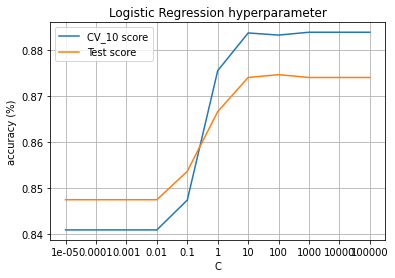

In [14]:
# 使用邏輯斯迴歸演算法訓練
from sklearn.linear_model import LogisticRegression 

cv_scores=[]
test_scores=[]

x = [10**n for n in range(-5,6)]
x_str = [str(n) for n in x]

for c in x:
  log_reg = LogisticRegression(C=c,max_iter=1000).fit(X_train,Y_train)
  cv_scores.append(cross_val_score(log_reg,X_train,Y_train,cv=10).mean())
  test_scores.append(log_reg.score(X_test,Y_test))

plt.title('Logistic Regression hyperparameter')
plt.plot(x_str,cv_scores,label='CV_10 score')
plt.plot(x_str,test_scores,label='Test score')
plt.xlabel('C')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

LogisticRegression C=1000-100000 近乎一樣因此設1000

In [15]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression(C=1000,max_iter=1000)
log_reg.fit(X_train,Y_train)
predictions = log_reg.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.8740740740740741
[[1330   43]
 [ 161   86]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1373
           1       0.67      0.35      0.46       247

    accuracy                           0.87      1620
   macro avg       0.78      0.66      0.69      1620
weighted avg       0.86      0.87      0.86      1620



STEP 4.3 使用支持向量機訓練

In [ ]:
##這邊跑很久沒跑完,SVM參數自己選用
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C':np.linspace(1,100,100),
        'gamma':np.linspace(0.01,1,100),
        'kernel':['linear','rbf','poly','sigmoid']}
model = RandomizedSearchCV(SVC(),param_grid, n_iter=100) #隨機搜尋超參數
# model.fit(X_train,Y_train)
CV_score = cross_val_score(model,X_train,Y_train,cv=10)
print('Best params:',model.best_params_)
print('CV_10 score:',CV_score.mean().round(3))
print('Test score:',model.score(X_test,Y_test).round(3))

In [58]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
SVM_method = SVC(C=1,gamma=100,kernel='rbf')
SVM_method.fit(X_train,Y_train)
predictions = SVM_method.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.8839506172839506
[[1326   47]
 [ 141  106]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1373
           1       0.69      0.43      0.53       247

    accuracy                           0.88      1620
   macro avg       0.80      0.70      0.73      1620
weighted avg       0.87      0.88      0.87      1620



STEP 4.4 使用決策樹訓練

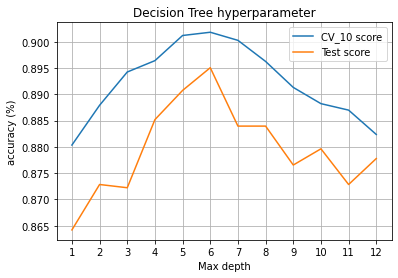

In [63]:
from sklearn.tree import DecisionTreeClassifier
cv_scores=[]
test_scores=[]
x = np.arange(12)+1
x_str = [str(n) for n in x]

for d in x:
  tree = DecisionTreeClassifier(max_depth=d).fit(X_train,Y_train)
  cv_scores.append(cross_val_score(tree,X_train,Y_train,cv=10).mean())
  test_scores.append(tree.score(X_test,Y_test))  

plt.title('Decision Tree hyperparameter')
plt.plot(x_str,cv_scores,label='CV_10 score')
plt.plot(x_str,test_scores,label='Test score')
plt.xlabel('Max depth')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

決策樹最大深度為6時，模型最佳，再用隨機森林搜尋最佳模型

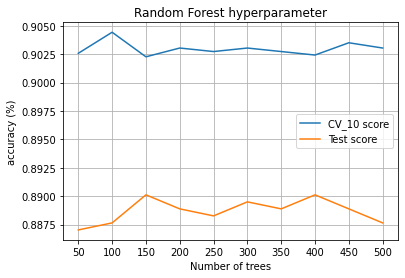

In [64]:
from sklearn.ensemble import RandomForestClassifier #用隨機森林找出最佳決策樹數量
cv_scores=[]
test_scores=[]
x = (np.arange(10)+1)*50
x_str = [str(n) for n in x]

for t in x:
  tree = RandomForestClassifier(n_estimators=t, max_depth=6 , random_state=54)
  tree.fit(X_train,Y_train)
  cv_scores.append(cross_val_score(tree,X_train,Y_train,cv=10).mean())
  test_scores.append(tree.score(X_test,Y_test))  

plt.title('Random Forest hyperparameter')
plt.plot(x_str,cv_scores,label='CV_10 score')
plt.plot(x_str,test_scores,label='Test score')
plt.xlabel('Number of trees')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()  

決策樹最大深度為6，150與400顆決策樹時，隨機森林的模型較佳

In [73]:
tree_method = RandomForestClassifier(n_estimators=150, max_depth=6 , random_state=54)
tree_method.fit(X_train,Y_train)
predictions = tree_method.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.8901234567901235
[[1309   64]
 [ 114  133]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1373
           1       0.68      0.54      0.60       247

    accuracy                           0.89      1620
   macro avg       0.80      0.75      0.77      1620
weighted avg       0.88      0.89      0.88      1620



總結：f1-score-accuracy 
* KNN：88(%)
* LogisticRegression:87(%)   
* SVM:88(%) 
* RandomForest:89(%)     

選用RandomForest的參數與模型來預測test集答案。

In [ ]:
df_test = pd.read_csv('test.csv') #讀取測試資料

查看測試資料是否有缺失

In [75]:
df_test.info() #查看表格內容是否有丟失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       900 non-null    int64  
 1   Administrative           900 non-null    int64  
 2   Administrative_Duration  900 non-null    float64
 3   Informational            900 non-null    int64  
 4   Informational_Duration   900 non-null    float64
 5   ProductRelated           900 non-null    int64  
 6   ProductRelated_Duration  900 non-null    float64
 7   BounceRates              900 non-null    float64
 8   ExitRates                900 non-null    float64
 9   PageValues               900 non-null    float64
 10  SpecialDay               900 non-null    float64
 11  Month                    900 non-null    int64  
 12  OperatingSystems         900 non-null    int64  
 13  Browser                  900 non-null    int64  
 14  Region                   9

In [78]:
X_test_standardization = df_test[highly_corr_features] #取出df_test特徵資料
X_test_standardization_features = maxabs.fit_transform(X_test_standardization)#對df_test特徵資料標準化
X_df_test= pd.DataFrame(X_test_standardization_features,columns=highly_corr_features)
predictions = tree_method.predict(X_df_test)
ID_df=df_test['ID']
Revenue_df=pd.DataFrame({'Revenue':predictions})
sample_submission = pd.merge(ID_df, Revenue_df, left_index=True, right_index=True)
print(sample_submission)
sample_submission.to_csv('sample_submission.csv') #存為CSV檔

       ID  Revenue
0    6162        0
1    8143        0
2    5571        1
3    3933        0
4     934        0
..    ...      ...
895  5887        0
896  5273        0
897  5833        0
898  2119        0
899  4448        0

[900 rows x 2 columns]
